In [1]:
import pandas as pd
df= pd.read_csv(r"C:\Users\olona\Downloads\Jose Portilla courses\NLP\Udemy_NLP_Natural_Language_Processing_with_Python_2019-1.part1_Downloadly.ir\NLP\UPDATED_NLP_COURSE\05-Topic-Modeling\quora_questions.csv")
df

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
...,...
404284,How many keywords are there in the Racket prog...
404285,Do you believe there is life after death?
404286,What is one coin?
404287,What is the approx annual cost of living while...


*****

# Preprocessing 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
cv = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')

In [4]:
dtm = cv.fit_transform(df['Question'])

In [5]:
dtm

<404289x21804 sparse matrix of type '<class 'numpy.int64'>'
	with 1957885 stored elements in Compressed Sparse Row format>

****

# LDA

In [6]:
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
LDA = LatentDirichletAllocation(n_components=20,random_state=42)

In [8]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=20, random_state=42)

****

In [9]:
len(cv.get_feature_names())

21804

In [10]:
import random
for i in range(10):
    random_word_id = random.randint(0,21804)
    print(cv.get_feature_names()[random_word_id])

banning
associates
perpendicular
basic
blu
sets
spaniel
make
engineer
paragraphs


****

# Showing top words per topic

In [11]:
len(LDA.components_)

20

In [12]:
def get_lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        topic_words = [model.components_[i, j] for j in model.components_[i].argsort()[:-top_n_words-1:-1]]
        word_dict['Topic #' + '{:02d}'.format(i+1)] = topic_words

    return pd.DataFrame(word_dict)

get_lda_topics(LDA, 20, 10)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13,Topic #14,Topic #15,Topic #16,Topic #17,Topic #18,Topic #19,Topic #20
0,3393.509581,8735.042913,4001.902833,23393.449832,7927.163950,3514.779990,3440.784872,9144.118296,2857.638497,4944.664507,8844.409142,26637.949080,3462.784313,6967.978251,3676.050000,3029.037991,4964.308706,1672.091538,3853.710160,8969.048383
1,2226.813501,6078.138970,1934.335569,6229.856025,2182.483193,1767.110645,2765.895003,5347.950834,2485.898846,4510.218091,2648.950079,4587.050000,1834.440911,6695.434152,3537.050000,2165.530194,2851.049984,1553.047769,3337.050000,3665.976489
2,1299.502888,5393.829298,1492.821868,3841.853814,1744.050000,1443.067863,2451.997857,3237.849570,2459.179200,4249.050000,1363.928932,4109.043742,1830.912593,3518.041092,3525.050000,2061.246857,2409.072970,1315.227866,2877.049787,2750.009515
3,1240.027816,3251.644770,1344.215213,3008.959154,1526.050000,1322.049992,1702.871474,3151.661008,2425.629440,3627.838084,1267.050000,2258.898773,1744.795419,3311.036655,2311.630113,1766.609725,2202.576464,1208.429021,2063.044915,2382.310547
4,1186.131517,2056.050000,1244.053605,2393.303857,1388.639324,1297.112149,1650.050000,2417.721428,2298.409447,3036.050000,1253.050000,2179.473186,1675.376509,3177.364177,2172.780223,1621.729671,1944.024022,1151.019411,1517.932002,2231.866446
5,1129.898262,1964.199153,1163.469806,2181.254910,1329.271253,1141.405459,1623.025983,2319.050000,2224.222064,2886.346571,1245.818505,1749.899198,1556.126219,2837.045701,1967.651160,1604.148092,1807.626423,1052.149139,1457.050000,2203.050000
6,1106.957674,1374.377588,1028.050000,2012.178869,1243.726430,1117.129271,1248.285957,2257.802608,2133.946545,2508.906283,1128.418934,1404.621498,1481.598820,2566.673776,1945.853910,1261.225630,1765.142982,991.690553,1441.050000,1973.021309
7,1025.115342,1241.859124,958.576230,1670.050000,1046.764878,914.528183,1220.213283,2120.050000,1554.050000,2379.656035,1123.050000,1205.820884,1450.157135,2537.403607,1876.479077,1062.971991,1551.050000,818.050000,1171.795961,1579.050000
8,999.369970,1151.924890,950.276609,1613.655665,1004.988141,891.050000,1196.875611,1650.216513,1397.683548,1874.013194,1045.858031,1087.560281,1448.006848,2156.767332,1682.956047,1057.049564,1525.559324,799.050000,1117.048039,1208.050000
9,929.050000,1083.551191,939.564118,1578.695047,1003.998079,878.383164,917.050000,1323.846400,1373.518901,1757.974124,1036.762679,1079.050000,1416.049906,1613.634422,1490.527678,1002.344042,1523.325672,786.894631,1101.050000,927.050000


In [13]:
import pandas as pd

def get_lda_topics(model, vectorizer, num_topics, top_n_words):
    feature_names = vectorizer.get_feature_names()
    word_dict = {}
    for i in range(num_topics):
        topic_words = [feature_names[j] for j in model.components_[i].argsort()[:-top_n_words-1:-1]]
        word_dict['Topic #' + '{:02d}'.format(i+1)] = topic_words

    return pd.DataFrame(word_dict)

get_lda_topics(LDA, cv, 20, 10)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13,Topic #14,Topic #15,Topic #16,Topic #17,Topic #18,Topic #19,Topic #20
0,person,make,indian,best,life,love,use,people,old,best,did,does,engineering,time,500,sex,world,car,way,quora
1,iphone,difference,india,learn,india,school,used,trump,instagram,start,thing,mean,student,know,notes,like,movie,bank,weight,questions
2,high,money,relationship,way,meaning,friends,examples,donald,facebook,english,modi,work,study,things,1000,feel,movies,math,lose,question
3,girlfriend,online,language,buy,pakistan,chinese,word,think,years,2016,god,like,computer,day,app,software,best,power,best,google
4,effects,earn,website,free,good,differences,social,president,account,improve,police,long,science,new,india,ve,women,code,ways,people
5,big,does,programming,phone,happen,better,average,clinton,year,business,stop,water,job,possible,black,best,com,problem,food,ask
6,like,new,education,good,war,state,history,country,number,books,safe,cost,career,don,rs,experience,men,account,eat,different
7,guy,india,like,laptop,purpose,getting,card,hillary,password,prepare,hotel,feel,university,going,data,jobs,girls,advantages,body,answer
8,friend,looking,china,hair,usa,terms,bad,win,days,exam,control,earth,whatsapp,girl,companies,service,like,alcohol,human,answers
9,boyfriend,universities,parents,video,living,fall,sentence,india,10,read,worst,light,tv,travel,government,management,job,center,fat,asked


In [23]:

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook(local=True)

# Assuming you have already trained your LDA model and vectorized your data

# Generate the LDA visualization
lda_viz = pyLDAvis.sklearn.prepare(LDA, dtm, cv)

# Display the visualization in the Jupyter Notebook
pyLDAvis.display(lda_viz)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_viz, 'lda_visualization.html')



In [38]:
display(HTML('lda_visualization.html'))

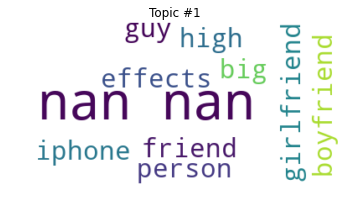

<Figure size 432x288 with 0 Axes>

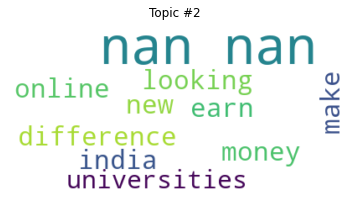

<Figure size 432x288 with 0 Axes>

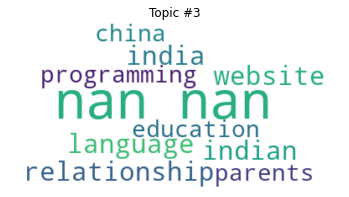

<Figure size 432x288 with 0 Axes>

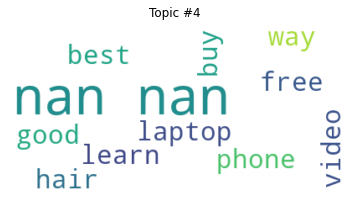

<Figure size 432x288 with 0 Axes>

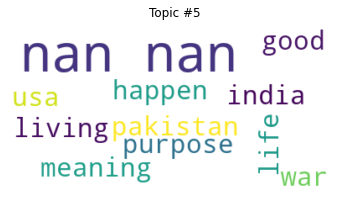

<Figure size 432x288 with 0 Axes>

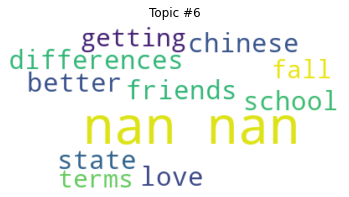

<Figure size 432x288 with 0 Axes>

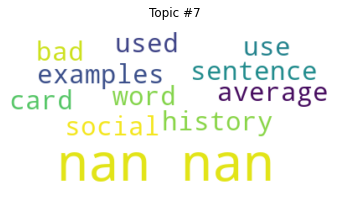

<Figure size 432x288 with 0 Axes>

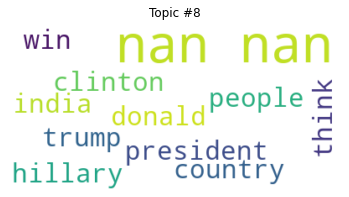

<Figure size 432x288 with 0 Axes>

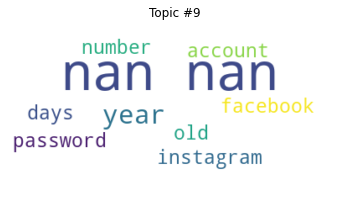

<Figure size 432x288 with 0 Axes>

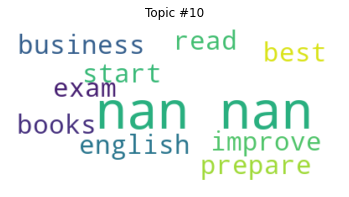

<Figure size 432x288 with 0 Axes>

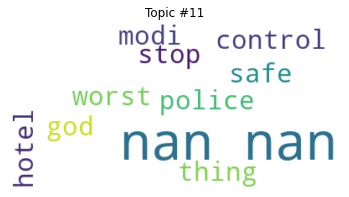

<Figure size 432x288 with 0 Axes>

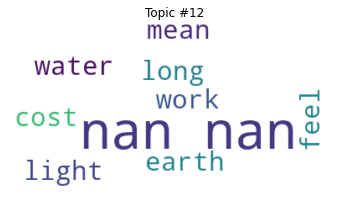

<Figure size 432x288 with 0 Axes>

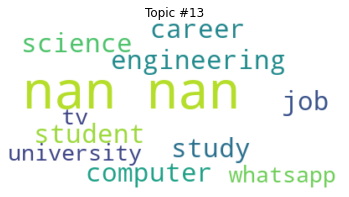

<Figure size 432x288 with 0 Axes>

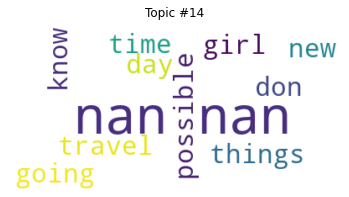

<Figure size 432x288 with 0 Axes>

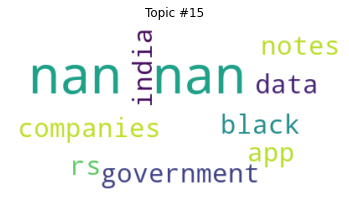

<Figure size 432x288 with 0 Axes>

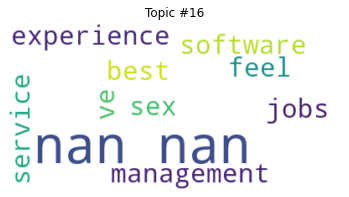

<Figure size 432x288 with 0 Axes>

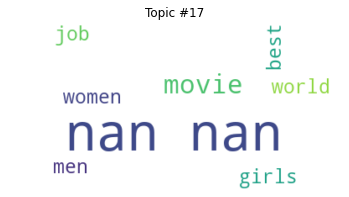

<Figure size 432x288 with 0 Axes>

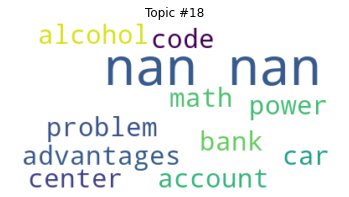

<Figure size 432x288 with 0 Axes>

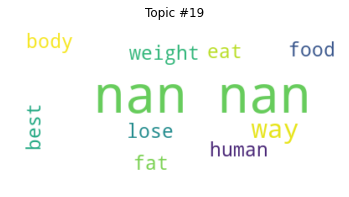

<Figure size 432x288 with 0 Axes>

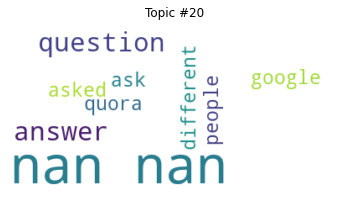

<Figure size 432x288 with 0 Axes>

In [46]:
# Assuming you have already defined LDA, cv, and num_topics
from wordcloud import WordCloud
num_topics = 20
top_n_words = 10

# Get the topic keywords
topics_df = get_lda_topics(LDA, cv, num_topics, top_n_words)

# Generate word clouds for each topic
for i in range(num_topics):
    # Convert the topic keywords to string
    keywords = ' '.join(str(word) for word in topics_df['Topic #' + '{:02d}'.format(i+1)])
    
    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate(keywords)
    
    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic #{}'.format(i+1))
    plt.show()
    
    plt.savefig('wordcloud_topic_{}.png'.format(i+1))









In [16]:
!pip install --user pandas==1.2.5



In [30]:
topic_results = LDA.transform(dtm)

In [31]:
len(topic_results.argmax(axis=1))

404289

In [32]:
df['Topic'] = topic_results.argmax(axis=1)

In [33]:
df.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,2
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,2
2,How can I increase the speed of my internet co...,3
3,Why am I mentally very lonely? How can I solve...,5
4,"Which one dissolve in water quikly sugar, salt...",11


In [45]:
df['Question'][0]

'What is the step by step guide to invest in share market in india?'